In [34]:
import sqlalchemy
from sqlalchemy import create_engine, Table, inspect, text, MetaData
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t

In [35]:
print([driver for driver in pyodbc.drivers()])

['SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server']


In [36]:
server = 'localhost'
database = 'AdventureWorks2022'
driver = 'ODBC Driver 17 for SQL Server'
connection_string = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(connection_string)
connection = engine.connect()

In [37]:
pd.read_sql("SELECT TOP (1000) [ProductCategoryID],[Name] FROM [AdventureWorks2022].[Production].[ProductCategory]", engine)

,ProductCategoryID,Name
0,4,Accessories
1,1,Bikes
2,3,Clothing
3,2,Components


In [38]:
pd.read_sql("SELECT TOP (1000) [SalesReasonID],[Name],[ReasonType] FROM [AdventureWorks2022].[Sales].[SalesReason]", engine)

,SalesReasonID,Name,ReasonType
0,1,Price,Other
1,2,On Promotion,Promotion
2,3,Magazine Advertisement,Marketing
3,4,Television Advertisement,Marketing
4,5,Manufacturer,Other
5,6,Review,Other
6,7,Demo Event,Marketing
7,8,Sponsorship,Marketing
8,9,Quality,Other
9,10,Other,Other


In [39]:
pd.read_sql("SELECT TOP (1000) [TerritoryID],[Name],[CountryRegionCode],[SalesLastYear]\
FROM [AdventureWorks2022].[Sales].[SalesTerritory]", engine)

,TerritoryID,Name,CountryRegionCode,SalesLastYear
0,1,Northwest,US,3.298694e+06
1,2,Northeast,US,3.607149e+06
2,3,Central,US,3.205014e+06
3,4,Southwest,US,5.366576e+06
4,5,Southeast,US,3.925071e+06
5,6,Canada,CA,5.693989e+06
6,7,France,FR,2.396540e+06
7,8,Germany,DE,1.307950e+06
8,9,Australia,AU,2.278549e+06
9,10,United Kingdom,GB,1.635823e+06


In [40]:
query_join = """
    SELECT
        t1.SalesOrderID AS t1_Column1,
        t1.SalesReasonID AS t1_Column2,
        t2.CustomerID AS t2_Column1,
        t2.TerritoryID AS t2_Column2
    FROM
        Sales.SalesOrderHeaderSalesReason AS t1
    INNER JOIN 
        Sales.Customer AS t2 ON t1.SalesReasonID = t2.CustomerID
    ORDER BY t2_Column2;
"""

df_j = pd.read_sql(query_join, engine)

print(df_j)

       t1_Column1  t1_Column2  t2_Column1  t2_Column2
0           46681           2           2           1
1           46682           2           2           1
2           46688           2           2           1
3           46689           2           2           1
4           46690           2           2           1
...           ...         ...         ...         ...
27642       75088          10          10           6
27643       75094          10          10           6
27644       75111          10          10           6
27645       75099          10          10           6
27646       75107          10          10           6

[27647 rows x 4 columns]


In [41]:
# här tar jag fram urvalsstorleken och andelen av de olika regionerna samt hela populationsstorleken av de som svarat

NorthwestUS = [] 
SouthwestUS = []

for i in df_j["t2_Column2"]:
    if i == 1:
        NorthwestUS.append(i)
    elif i == 4:
        SouthwestUS.append(i)

print(len(NorthwestUS))
print(len(SouthwestUS))
print(len(df_j["t2_Column2"])) 
print((len(NorthwestUS)+len(SouthwestUS))/(len(df_j["t2_Column2"])))

# Som vi ser i resultatet utgör dessa två regioner den stora majoriteten av kundbasen som svarat på frågan om köpmotiv.

20988
3713
27647
0.893442326473035


In [42]:
# Jag har valt att jämföra nordvästra och sydvästra USA. mitt nästa steg är att ta reda på hur fördelningen av de olika 
# köpmotiven ser ut i dessa två regioner.

Price = []
Promotion = []
Magazine_Ad = []
Television_Ad = []
Manufacturer = []
Review = []
Demo_Event = []
Sponsorship = []
Quality = []
Other = []

# här tar jag fram fördelningen för nordvästra USA

for t1_2, t2_2 in zip(df_j["t1_Column2"], df_j["t2_Column2"]):
    if t2_2 == 1:
        if t1_2 == 1:
            Price.append(t1_2)
        elif t1_2 == 2:
            Promotion.append(t1_2)
        elif t1_2 == 3:
            Magazine_Ad.append(t1_2)
        elif t1_2 == 4:
            Television_Ad.append(t1_2)
        elif t1_2 == 5:
            Manufacturer.append(t1_2)
        elif t1_2 == 6:
            Review.append(t1_2)
        elif t1_2 == 7:
            Demo_Event.append(t1_2)
        elif t1_2 == 8:
            Sponsorship.append(t1_2)
        elif t1_2 == 9:
            Quality.append(t1_2)
        elif t1_2 == 10: 
            Other.append(t1_2)

print('Price =', len(Price), 'Promotion =', len(Promotion), 'Magazine_Ad =', len(Magazine_Ad), \
      'Television_Ad =', len(Television_Ad), 'Manufacturer =', len(Manufacturer), 'Review =', len(Review), \
      'Demo_Event =', len(Demo_Event), 'Sponsorship =', len(Sponsorship), 'Quality =', len(Quality), 'Other =', len(Other))

Price = 17473 Promotion = 3515 Magazine_Ad = 0 Television_Ad = 0 Manufacturer = 0 Review = 0 Demo_Event = 0 Sponsorship = 0 Quality = 0 Other = 0


In [43]:
# här tar jag fram fördelningen för sydvästra USA

price = []
promotion = []
magazine_Ad = []
television_Ad = []
manufacturer = []
review = []
demo_Event = []
sponsorship = []
quality = []
other = []

for t1_2, t2_2 in zip(df_j["t1_Column2"], df_j["t2_Column2"]):
    if t2_2 == 4:
        if t1_2 == 1:
            price.append(t1_2)
        elif t1_2 == 2:
            promotion.append(t1_2)
        elif t1_2 == 3:
            magazine_Ad.append(t1_2)
        elif t1_2 == 4:
            television_Ad.append(t1_2)
        elif t1_2 == 5:
            manufacturer.append(t1_2)
        elif t1_2 == 6:
            review.append(t1_2)
        elif t1_2 == 7:
            demo_Event.append(t1_2)
        elif t1_2 == 8:
            sponsorship.append(t1_2)
        elif t1_2 == 9:
            quality.append(t1_2)
        elif t1_2 == 10: 
            other.append(t1_2)
            
print('Price =', len(price), 'Promotion =', len(promotion), 'Magazine_Ad =', len(magazine_Ad), \
      'Television_Ad =', len(television_Ad), 'Manufacturer =', len(manufacturer), 'Review =', len(review), \
      'Demo_Event =', len(demo_Event), 'Sponsorship =', len(sponsorship), 'Quality =', len(quality), 'Other =', len(other))

Price = 0 Promotion = 0 Magazine_Ad = 0 Television_Ad = 722 Manufacturer = 1746 Review = 1245 Demo_Event = 0 Sponsorship = 0 Quality = 0 Other = 0


In [44]:
# hur ser försäljningssiffrorna ut i de två valda regionerna i relation till hela landet (USA)

query_sales = """
SELECT [TerritoryID],[Name],[CountryRegionCode],[SalesLastYear]\
FROM [AdventureWorks2022].[Sales].[SalesTerritory] WHERE TerritoryID IN (1, 2, 3, 4, 5);
"""

df_s = pd.read_sql(query_sales, engine)
print(df_s)

   TerritoryID       Name CountryRegionCode  SalesLastYear
0            1  Northwest                US   3.298694e+06
1            2  Northeast                US   3.607149e+06
2            3    Central                US   3.205014e+06
3            4  Southwest                US   5.366576e+06
4            5  Southeast                US   3.925071e+06


In [45]:
Northwest_sales = df_s.loc[0]['SalesLastYear']
print("Sales in Northwest US:", Northwest_sales)

Southwest_sales = df_s.loc[3]['SalesLastYear']
print("Sales in Southwest US:", Southwest_sales)

total_sales = df_s['SalesLastYear'].sum()
print("Total sales last year:", total_sales)

Sales in Northwest US: 3298694.4938
Sales in Southwest US: 5366575.7098
Total sales last year: 19402504.6492


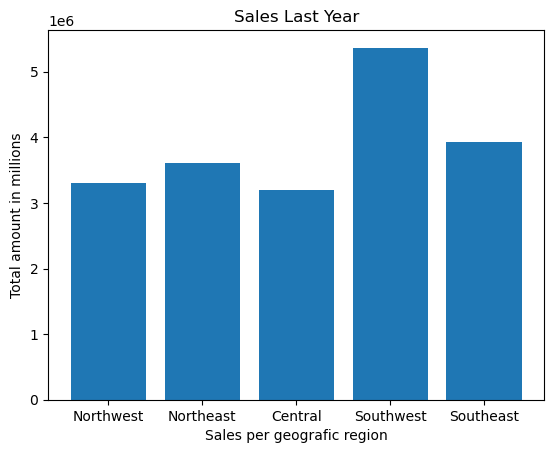

In [46]:
x_values = df_s['Name']
y_values = df_s['SalesLastYear']

plt.bar(x_values, y_values)
plt.xlabel('Sales per geografic region')
plt.ylabel('Total amount in millions')
plt.title('Sales Last Year')
plt.show()

In [47]:
# nästa steg blir att mäta signifikansen med hjälp av konfidensintervall och därmed se om vi kan dra några slutsatser samt vilka

mean_sales = df_s['SalesLastYear'].mean()
print("Mean value of the sales last year:", mean_sales)

print()

std_sales = df_s['SalesLastYear'].std()
print("Standard deviation from the mean value:", std_sales)

Mean value of the sales last year: 3880500.92984

Standard deviation from the mean value: 877483.2350244084


In [48]:
antal_observationer = 4 # avser åren 2011-2014
antal_frihetsgrader = antal_observationer - 1

stf = std_sales / np.sqrt(antal_observationer) # standardfelet för medelvärdet

# Beräkning av konfidensintervallet för skillnaden mellan värdena

t_värde = stats.t.ppf(0.975, df=antal_frihetsgrader)  # 0.975 för 95% konfidensnivå
KI_low = (Northwest_sales - Southwest_sales) - t_värde * stf
KI_high = (Northwest_sales - Southwest_sales) + t_värde * stf 

print(f"Konfidensintervall: ({KI_low}, {KI_high})")

Konfidensintervall: (-3464152.855626156, -671609.5763738449)


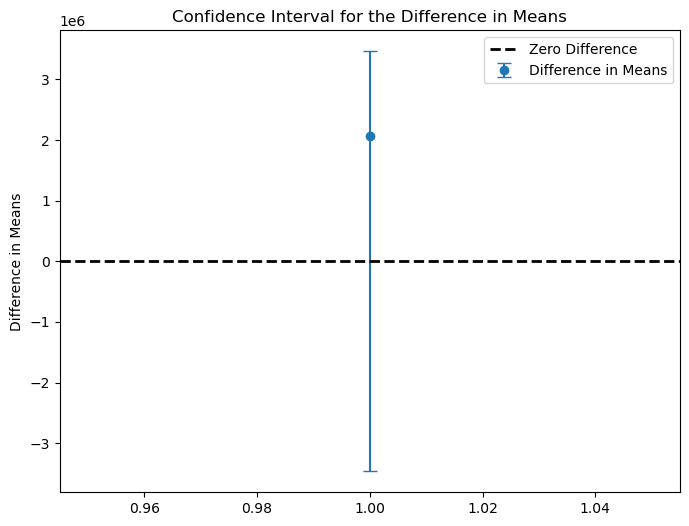

In [49]:
plt.figure(figsize=(8, 6))

# Calculate the confidence interval bounds
lower_bound = (Southwest_sales - Northwest_sales) - KI_low
upper_bound = (Southwest_sales - Northwest_sales) + KI_high

# jag skriver "Southwest_sales - Northwest_sales" och inte tvärtom, eftersom "yerr"-argumentet inte kan ha ett negativt värde

plt.errorbar(x=[1], y=[(Southwest_sales - Northwest_sales)], 
             yerr=[[lower_bound], [upper_bound]],
             fmt='o', capsize=5, label='Difference in Means')

plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero Difference')

plt.title('Confidence Interval for the Difference in Means')
plt.xlabel('')
plt.ylabel('Difference in Means')
plt.legend()
plt.show()

In [50]:
len(df_s)

5

In [51]:
# Beräkning av konfidensintervall för skattningarna var för sig

t_score = t.ppf(0.975, antal_frihetsgrader)

df_s_subset = df_s.loc[[0, 3]] # jag tar med enbart dessa 2 rader och inte samtliga 5 inom kolumnen

KI_Northwest = [
    Northwest_sales - t_score * (std_sales / np.sqrt(len(df_s_subset))), 
    Northwest_sales + t_score * (std_sales / np.sqrt(len(df_s_subset)))
]

KI_Southwest = [
    Southwest_sales - t_score * (std_sales / np.sqrt(len(df_s_subset))), 
    Southwest_sales + t_score * (std_sales / np.sqrt(len(df_s_subset)))
]

print("Confidence Interval for Sales in Northwest US:", KI_Northwest)
print("Confidence Interval for Sales in Southwest US:", KI_Southwest)

Confidence Interval for Sales in Northwest US: [1324068.204283772, 5273320.783316228]
Confidence Interval for Sales in Southwest US: [3391949.4202837725, 7341201.999316229]


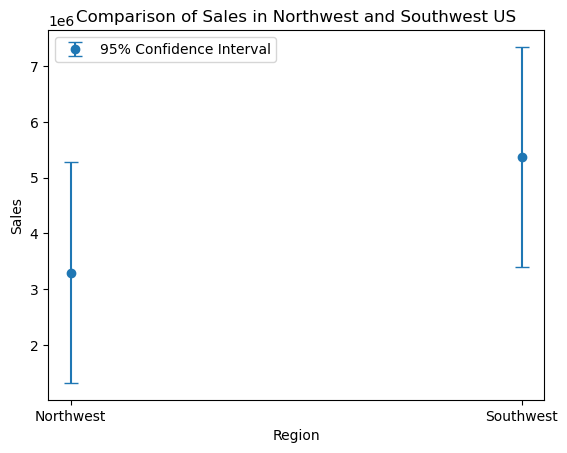

In [52]:
ki_northwest = np.array(KI_Northwest)
ki_southwest = np.array(KI_Southwest)

# jag illustrerar resultatet med en plot
plt.errorbar(x=['Northwest', 'Southwest'], y=[Northwest_sales, Southwest_sales],
             yerr=[(ki_northwest[1] - Northwest_sales, Northwest_sales - ki_northwest[0]),
                   (ki_southwest[1] - Southwest_sales, Southwest_sales - ki_southwest[0])],
             fmt='o', capsize=5, label='95% Confidence Interval')

plt.title('Comparison of Sales in Northwest and Southwest US')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Det framgår i illustrationen nedan att konfidensintervallen till stor del överlappar varandra.

In [53]:
query_customer_territory_1 = """
SELECT * 
  FROM [AdventureWorks2022].[Sales].[Customer]
  WHERE TerritoryID IN (1);
"""
q_c_t_1 =pd.read_sql(query_customer_territory_1, engine)
len(q_c_t_1)

3520

In [54]:
query_customer_territory_4 = """
SELECT * 
  FROM [AdventureWorks2022].[Sales].[Customer]
  WHERE TerritoryID IN (4);
"""
q_c_t_4 =pd.read_sql(query_customer_territory_4, engine)
len(q_c_t_4)

4696

In [55]:
print("Andelen kunder i nordvästra USA som angett köpmotiv:", len(NorthwestUS)/len(q_c_t_1))
print()
print("Andelen kunder i sydvästra USA som angett köpmotiv:", len(SouthwestUS)/len(q_c_t_4))

Andelen kunder i nordvästra USA som angett köpmotiv: 5.9625

Andelen kunder i sydvästra USA som angett köpmotiv: 0.7906729131175468
